<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kenneth\Desktop\IronHack AI Engineer\lab-unsupervised-learning-en\data\Wholesale customers data.csv")

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [ ]:
df.info() # Show column types

print(df.isnull().sum()) # Check for missing info. 


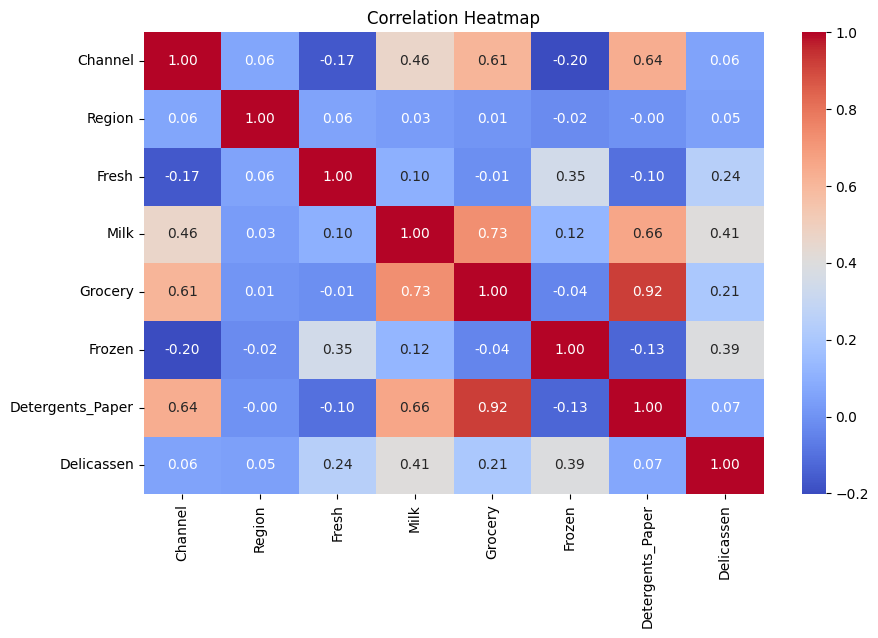

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


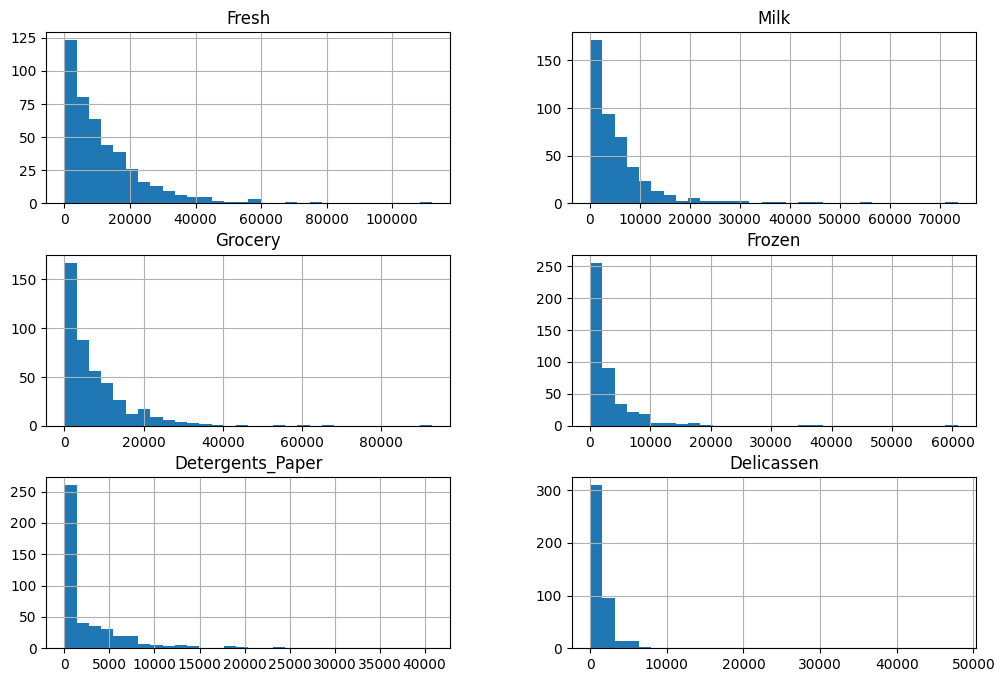

In [12]:
import numpy as np

print(df.drop(columns=["Channel", "Region"]).skew())

df.drop(columns=["Channel", "Region"]).hist(figsize=(12,8), bins=30)
plt.show()

In [ ]:
print(df.describe())

**My Observations**

Frozen, Grocery, Milk and Detergents Paper have a high correlation with eachother. People who spend more on groceries tend to buy more detergents. In the heatmap you can see that there is a strong link between groceries and milk. Suggesting that people that buy groceries also buy milk. Most customers spend not so much, and there are some customers that spend a lot of money, leading to a bit skewed data, the data need to be cleaned and transformed. 




# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
import numpy as np

#applying log transformation to handle the skewed data. 

df_cleaned = df.copy() #copying the dataframe
numerical_columns = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

df_cleaned[numerical_columns] = np.log1p(df_cleaned[numerical_columns])

print("after log transformation:\n", df_cleaned[numerical_columns].skew())


after log transformation:
 Fresh              -1.575326
Milk               -0.224063
Grocery            -0.674938
Frozen             -0.352655
Detergents_Paper   -0.235961
Delicassen         -1.091827
dtype: float64


**Your comment here**
 - Now most values are closer to 0 and the distibutions are more normalized. 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [14]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

scaler = StandardScaler()
customers_scale = df_cleaned.copy()  # Using the cleaned data from Challenge 2
customers_scale[numerical_columns] = scaler.fit_transform(customers_scale[numerical_columns])

print(customers_scale.head())


   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0        2       3  0.486184  0.976299  0.440155 -1.509250          0.644143   
1        2       3  0.087889  0.990956  0.652171  0.134052          0.766043   
2        2       3  0.016356  0.891151  0.454687  0.376899          0.804405   
3        1       3  0.517477 -0.957973 -0.084792  1.141574         -0.328712   
4        2       3  0.880631  0.439662  0.395847  0.757322          0.404939   

   Delicassen  
0    0.408966  
1    0.627926  
2    1.776833  
3    0.633133  
4    1.456588  


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [15]:
from sklearn.cluster import KMeans


### Looking to the elbow we can choose 2 like the correct number of clusters

In [45]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [18]:
customers_scale['Label'] = clusters

Count the values in `labels`.

In [19]:
print(customers_scale['Label'].value_counts())

Label
0    259
1    181
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5, min_samples=4) 

dbscan.fit(customers_scale)

customers_scale['labels_DBSCAN'] = dbscan.labels_


Count the values in `labels_DBSCAN`.

In [27]:
print(customers_scale['labels_DBSCAN'].value_counts())

labels_DBSCAN
-1    432
 1      4
 0      4
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
def plot_clusters(df, x_col, y_col, hue_col, title):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col, palette="viridis")
    plt.title(title)
    plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()



In [33]:
print(customers_scale.columns)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Label', 'labels_DBSCAN'],
      dtype='object')


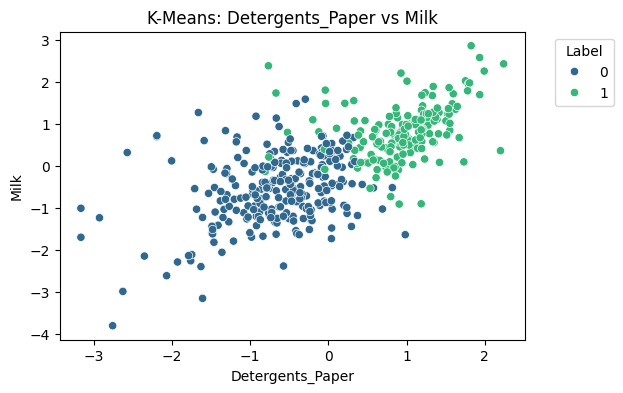

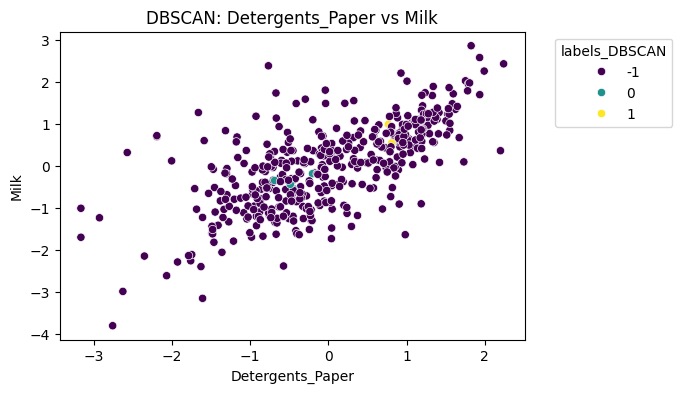

In [ ]:
def plot_clusters(df, x_col, y_col, hue_col, title):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col, palette='viridis')
    plt.title(title)
    plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


plot_clusters(df=customers_scale, 
              x_col='Detergents_Paper', 
              y_col='Milk', 
              hue_col='Label', 
              title='K-Means: Detergents_Paper vs Milk')

plot_clusters(df=customers_scale, 
              x_col='Detergents_Paper', 
              y_col='Milk', 
              hue_col='labels_DBSCAN', 
              title='DBSCAN: Detergents_Paper vs Milk')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

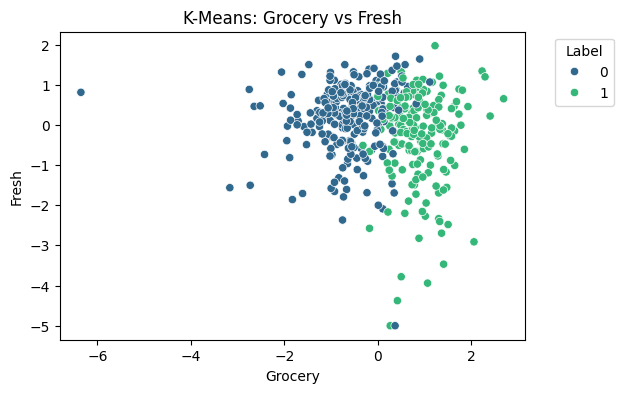

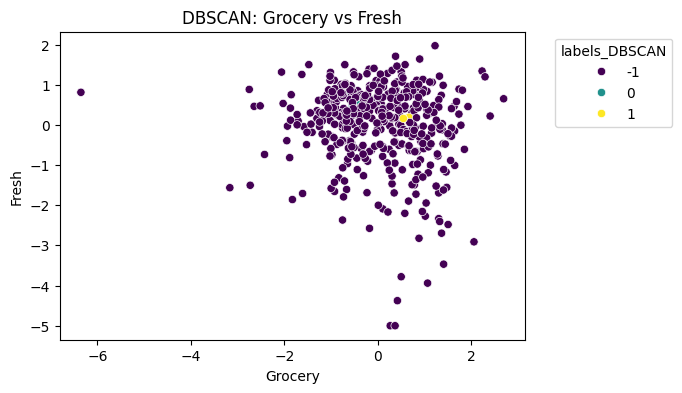

In [38]:
plot_clusters(
    df=customers_scale,
    x_col='Grocery',
    y_col='Fresh',
    hue_col='Label',
    title='K-Means: Grocery vs Fresh'
)

plot_clusters(
    df=customers_scale,
    x_col='Grocery',
    y_col='Fresh',
    hue_col='labels_DBSCAN',
    title='DBSCAN: Grocery vs Fresh'
)


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

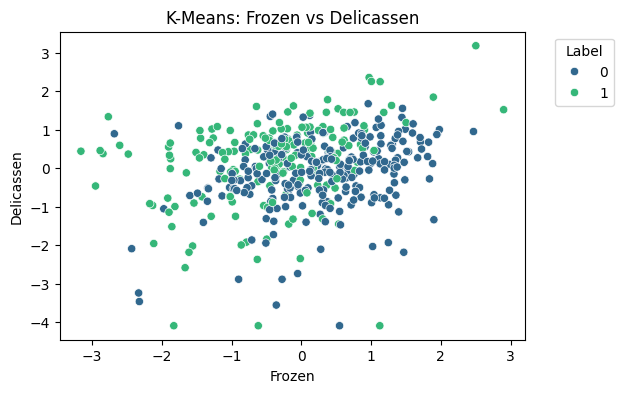

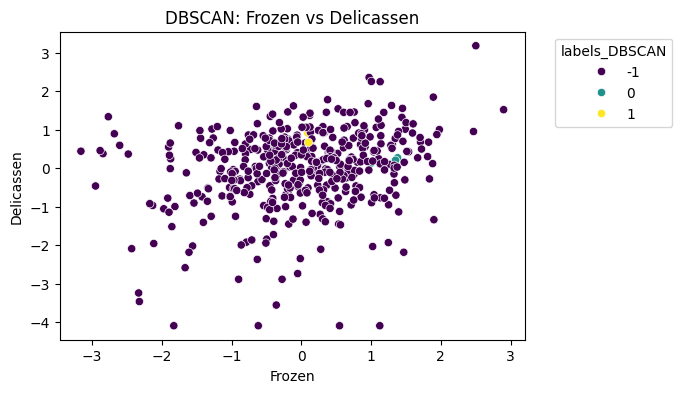

In [39]:
plot_clusters(
    df=customers_scale,
    x_col='Frozen',
    y_col='Delicassen',
    hue_col='Label',
    title='K-Means: Frozen vs Delicassen'
)

plot_clusters(
    df=customers_scale,
    x_col='Frozen',
    y_col='Delicassen',
    hue_col='labels_DBSCAN',
    title='DBSCAN: Frozen vs Delicassen'
)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [41]:
kmeans_means = customers_scale.groupby('Label').mean()
print("K-Means Cluster Means:")
display(kmeans_means)

dbscan_means = customers_scale.groupby('labels_DBSCAN').mean()
print("DBSCAN Cluster Means:")
display(dbscan_means)

K-Means Cluster Means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
Label,,,,,,,,,
0,1.023166,2.501931,0.199194,-0.559444,-0.621357,0.271199,-0.657317,-0.122354,-0.984556
1,1.751381,2.602210,-0.285035,0.800531,0.889125,-0.388070,0.940580,0.175081,-0.955801


DBSCAN Cluster Means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
labels_DBSCAN,,,,,,,,,
-1,1.319444,2.534722,-0.006739,-0.002270,-0.000869,-0.011612,-0.002217,-0.009011,0.409722
0,1.000000,3.000000,0.584507,-0.374609,-0.534918,1.200216,-0.458013,0.263273,0.000000
1,2.000000,3.000000,0.143317,0.619770,0.628786,0.053849,0.697463,0.709888,1.000000


Which algorithm appears to perform better?

**Your observations here**

The obeservations tell me if the data has well-separated and compact clusters, K-Means is better. K-Means divides the dataset into two distinct clusters, the cluster means are relatively balanced. 
If the data has irregularly shaped clusters or outliers, DBSCAN is better because it can detect noise and doesn't assume a fixed number of clusters.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

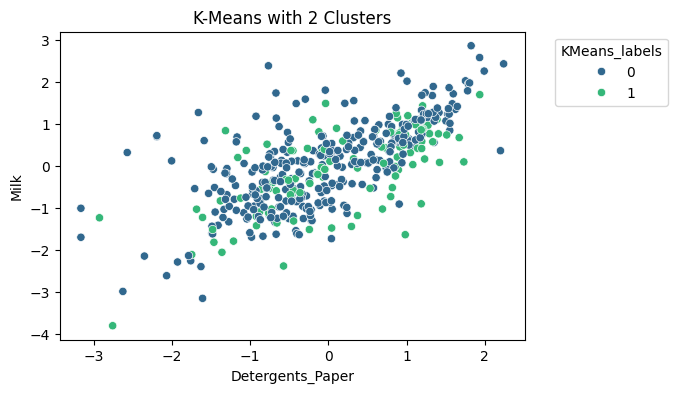

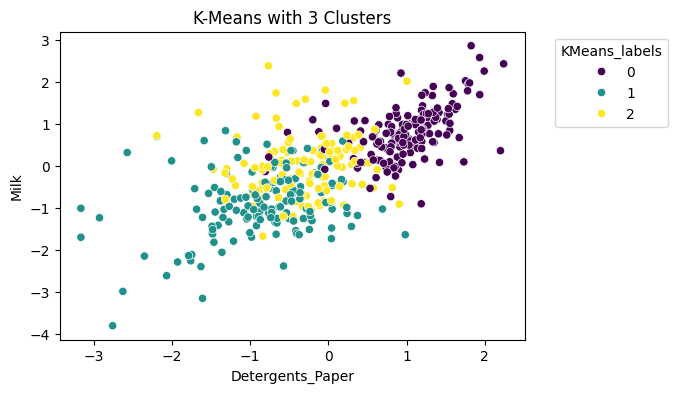

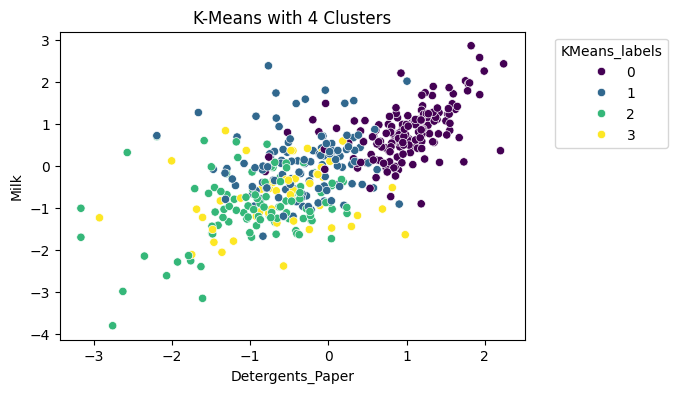

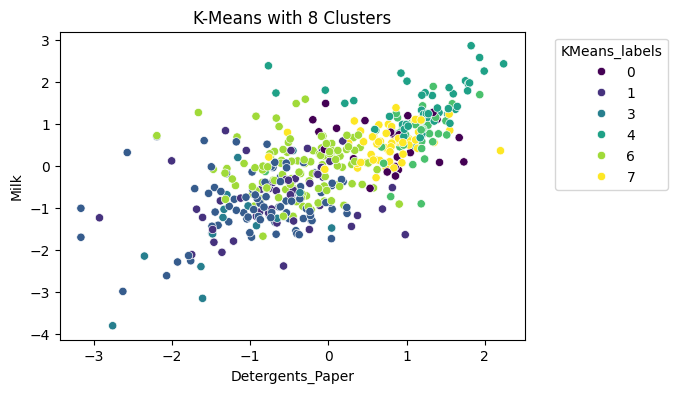

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to perform K-Means
def kmeans_experiment(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    customers_scale['KMeans_labels'] = kmeans.fit_predict(customers_scale)

    plot_clusters(
        df=customers_scale,
        x_col='Detergents_Paper',
        y_col='Milk',
        hue_col='KMeans_labels',
        title=f'K-Means with {n_clusters} Clusters'
    )

for k in [2, 3, 4, 8]:  # You can adjust these values
    kmeans_experiment(k)


**Your comment here**

If the goal is broad customer segmentation, 3 or 4 clusters seem reasonable. 8 clusters lead to oversegmentation. 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 